# Exercise 3 Quantitative Measures from ERP signals 

### Exercises 3 and 4 completes our discussion of extracting features from EEG experiments for building relationships with data. 

#### Exercise 3 is focused on extracting ERP measures (peak amplitude and latency) from ERP averages.  

### We will come back to these EEG measurements when we learn about classifiers.

## Face Perception Experiment 

### These data were extracted from the ERP CORE (https://osf.io/thsqg/wiki/home/).  

### These are data from the experiment, **N170 Face Perception Experiment**

### Some details of the experiment - 
*   The stimulus consists of four types of stimuli - Faces. Cars. Scrambled Faces, Scrambled Cars
*   On any trial one of these stimuli are presented (with probability 0.25)
*   On each trial, an image of a face, car, scrambled face, or scrambled car was presented in the center of the screen, and participants indicated whether a given stimulus was an “object” (face or car) or a “texture” (scrambled face or scrambled car)

## THIS IS ONE OF THE STIMULUS SETS FOR THE CLASS FINAL PROJECT.  IN THE FINAL PROJECT, THE TASK WILL BE TO CHARACTERIZE THE DIFFERENCES BETWEEN THE 4 STIMULUS CLASSES AND DEVELOP A CLASSIFIER MODEL TO PREDICT WHICH STIMULUS WAS PRESENTED ON EACH TRIAL. 


In [5]:
import numpy as np 
from matplotlib import pyplot as plt
from hdf5storage import loadmat, savemat 
from scipy.fftpack import fft
from scipy import signal  #THIS IS NEW!!!

#### There are 3 data files available for your inspection, 1_N170.mat, 2_N170.mat, 3_N170.mat 
#### The 3 files have the same experiment in different participants.  

In [6]:
data = loadmat('data/2_N170.mat')


In [7]:
channelnames = data['channelnames']
eeg = data['eeg']
eeg_time = data['eeg_time']
goodtrials = data['goodtrials']
nchannels = data['nchannels']
ntrials = data['ntrials']
response = data['response']
responsetime = data['responsetime']
samplingrate = data['samplingrate']
stimulus = data['stimulus']

# README 

### The information about the datafiles in an experiment is normally placed in a README file. 
### For convenience I am going to place that information here instead.

###  This data was obtained from the archive ERP CORE and reorganized for this class. 
###  Each file contains the data of one participant, indicated in the filename. 
###  The variables contained here are 

*   `ntrials` - number of trials in the experiment 
*   `nchannels` - number of EEG channels 
*   `samplingrate` - number of samples of EEG in per second
*   `eeg` - eegdata of the experiment.  of dimensions, ntrials x nchannels x ntimepoints.  The EEG is provided in units of volts. 
*   `eeg_time` - the time relative to *stimulus onset* in each EEG observation.
*   `channelnames` - the name of the EEG channels indicating where it is located.    
*   `stimulus` - the stimulus presented on each good trial, 1 = face, 2 = car, 3 = scrambled face, 4 = scrambled car 
*   `response` - variable indicating the response accuracy 1 = correct, -1 = incorrect, 0 = no response,
*   `responsetime` - time after stimulus onset when the subject provided a response. 
*   `goodtrials` - vector with value 1 if the trial had a response, 0 if no response or multiple responses.   

## Problem 1 

#### Compute the Event-related potential (ERP) separately for each stimulus type. 
#### Plot the data at electrodes corresponding to P3,Pz,P4 over parietal cortex, and PO7, O1,O2,PO8 over the occipital cortex.   
#### Apply filters and extract the P300/CPP amplitude and latency (timing of the peak after stimulus presentation) at electrode Pz. 
#### Apply filters and extract the N170 amplitude and latency (timing) at one of PO7,PO8 for the face and car stimuli.  Select the electrode that has the clearest N170 for all 3 participants data.   Alternatively, you could collapse the 2 electrodes data by averaging them together.   
#### For the scrambled face and scrambled car stimuli, use the latency of the face and car stimuli, and extract the voltage of the corresponding scrambled stimulus response.  
####
#### **Your notebook should run cleanly.  That is, I should be able to change which data file is being run, and it should be able to run and make all of the above plots and quantitative estimates.**  



In [19]:
# Compute the Event-related potential (ERP) separately for each stimulus type. 
eeg = eeg * 10**6
erp_face = np.mean(eeg[(stimulus == 1),:,:], axis = 0)
erp_car = np.mean(eeg[(stimulus == 2),:,:], axis = 0)
erp_scram_face = np.mean(eeg[(stimulus == 3),:,:], axis = 0)
erp_scram_car = np.mean(eeg[(stimulus == 4),:,:], axis = 0)
erps = {1: erp_face, 2:erp_car, 3:erp_scram_face, 4:erp_scram_car}

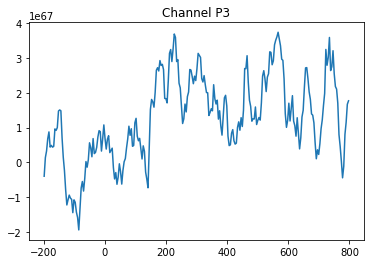

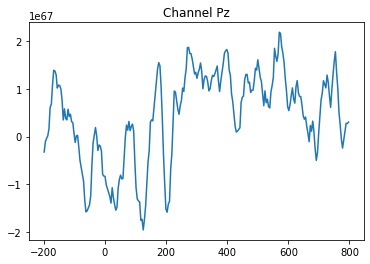

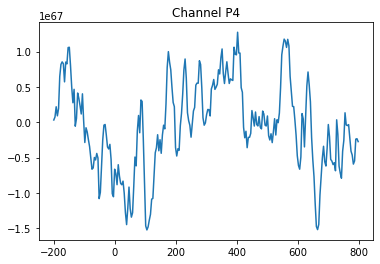

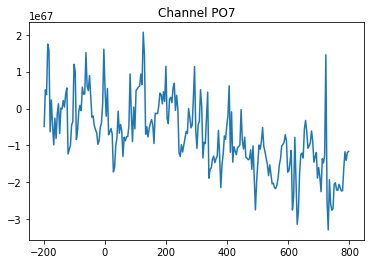

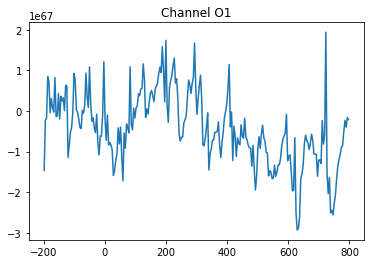

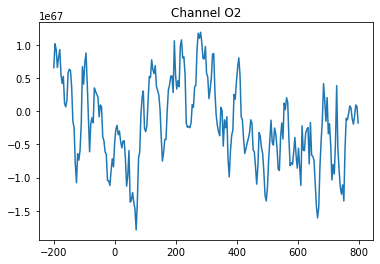

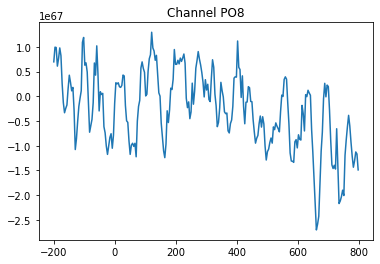

In [41]:
# Plot the data @ electrodes corresponding to 
# P3,Pz,P4 over parietal cortex, & PO7, O1,O2,PO8 over the occipital cortex.   
#P3= channelnames[6], Pz=12, P4=23, P07=8, O1=10, O2=27, PO8=25
channel_positions = [6,12,23,8,10,27,25]
for i in range(len(channel_positions)):
    position = int(channel_positions[i])
    plt.plot(eeg_time,eeg[0, position,:])
    plt.title('Channel '+ str(channelnames[position]))
    plt.show()

In [ ]:
# Apply filters and extract the P300/CPP amplitude & 
# latency (timing of the peak after stimulus presentation) at electrode Pz. 
